<a href="https://colab.research.google.com/github/cavs1010/NBA_Trends/blob/main/Codecademy_NBA_Trends_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏀NBA Trends Project

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Data_Science/03_NBA_Trends'
%pwd

/content/drive/MyDrive/Data_Science/03_NBA_Trends


'/content/drive/MyDrive/Data_Science/03_NBA_Trends'

In this project, it will be analyzed data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

More info about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project, it has been limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

It will be created several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another. [TO DELETE]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [ ]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [ ]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose I want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, let's create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [ ]:
knicks_pts = nba_2010[nba_2010.fran_id == 'Knicks'].pts
nets_pts = nba_2010[nba_2010.fran_id == 'Nets'].pts

### Task 2

Let's calculate the difference between the two teams’ average points scored and save the result as diff_means_2010.


In [ ]:
diff_means_2010 = np.mean(knicks_pts) - np.mean(nets_pts)
print(f'The points average mean difference betwee the knicks and the nets in 2010 is {diff_means_2010: .2f}')

The points average mean difference betwee the knicks and the nets in 2010 is  9.73


*Based on this result, it is possible to see that the difference in points scored by the Knicks and the Nets was not significant during 2010. However, measuring the mean is insufficient to conclude this, and an evaluation of the frequency distribution appears to be more appropriate for reaching a better conclusion.*

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Let's create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.


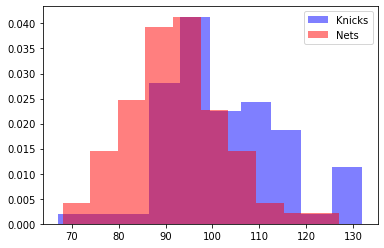

In [ ]:
plt.hist(knicks_pts, color = 'blue', label = 'Knicks', density = True, alpha = 0.5)
plt.hist(nets_pts, color = 'red', label = 'Nets', density = True, alpha = 0.5)
plt.legend()
plt.show()

*The previous plot provides more information about the difference in points scored by the two teams. Based on this graph, it is possible to conclude that the Knicks scored more points than the Nets in 2010. This statement is also supported by the difference in means calculated in Task 2.*

### Task 4
Now, let’s compare the 2010 games to 2014 and replicate the steps from Tasks 2 and 3 using `nba_2014`. 


In [ ]:
knicks_pts = nba_2014[nba_2014.fran_id == 'Knicks'].pts
nets_pts = nba_2014[nba_2014.fran_id == 'Nets'].pts
diff_means_2014 = np.mean(knicks_pts) - np.mean(nets_pts)
print(f'The points average mean difference betwee the knicks and the nets in 2014 is {diff_means_2014: .2f}')

The points average mean difference betwee the knicks and the nets in 2014 is  0.45


*The mean difference is close to zero, indicating that the two teams performed similarly by 2014. As previously stated, a frequency plot could provide additional insights about their performance.*

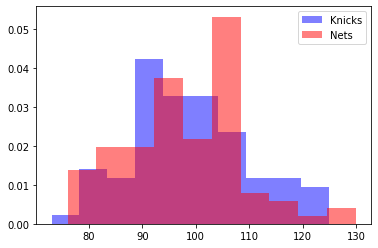

In [ ]:
plt.hist(knicks_pts, color = 'blue', label = 'Knicks', density = True, alpha = 0.5)
plt.hist(nets_pts, color = 'red', label = 'Nets', density = True, alpha = 0.5)
plt.legend()
plt.show()

*Although the mean difference between the Nets and the Knicks is close to zero, the overlapping frequency plot shows that the Nets have consistently scored more points than the Knicks. It's also worth noting that the Nets' games have improved since 2010.*

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.




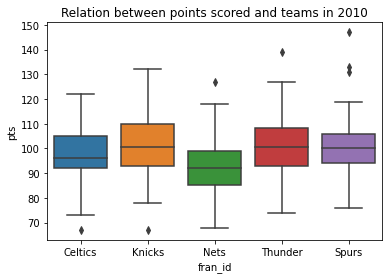

In [ ]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.title('Relation between points scored and teams in 2010');

*In 2010, the number of points scored by all teams seemed to be similar given that most of the boxplots overlapped each other. The only team that appears to have scored fewer points is the Nets.*

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 




In [ ]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


*The variables of `game_location` and `game_outcome` appear to be related in some way. It appears that teams lose more when they play away and win more when they play at home. This table can be transformed into a proportions table to produce a clearer result.*

### Task 7

Convert table created in task 5 in a table of proportions.

In [ ]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


*It can partly confirmed what was found in Task 6. A chi_2 will be evaluated to corroborate this.*

### Task 8
Let's calculate the expected contingency table and the Chi-Square statistic.




In [ ]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(f'The chi2 is {chi2:.2f}, with a p-value of {pval:.2f}')

[[119. 119.]
 [106. 106.]]
The chi2 is 6.50, with a p-value of 0.01


*A Chi-squared value greater than about 4 in a 2x2 table indicates an association between the evaluated categorical variables. Because the Chi-squared was greater than 4 and the associated p-value was less than 0.05 in this case, it can be concluded that there is a relationship between the two categorical variables `game_location` and `game_ouctome`.*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, let's calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset.


In [ ]:
cov_forecast_points_diff = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(cov_forecast_points_diff)

[[  0.05   1.37]
 [  1.37 186.56]]


*The covariance is not recommended because it only shows the direction but not the strength. As can be seen, higher `forecast` result in a higher `point_diff`. To evaluate the strength, the correlation of these two variables will be calculated in the following task*

### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`.


In [ ]:
point_diff_forecast_corr, p_value = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(f'The correlation between the two variables is {point_diff_forecast_corr:.2f}, with a p-value of {p_value:.2e}')

The correlation between the two variables is 0.44, with a p-value of 9.41e-23


*There is a suggestion that the two variables are related. It is not strong, but is still perceptible. This also suggests that 538 has somehow been accurate when predicting the winner of a game. Let's look at these two variables graphically.*

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis).

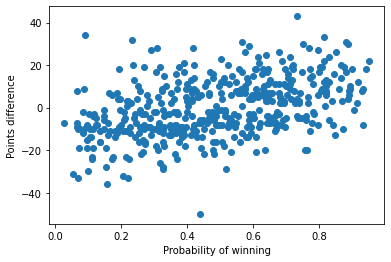

In [ ]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel('Probability of winning')
plt.ylabel('Points difference')
plt.show()

*The plot corresponds to what was discovered previously with the correlation value: a weak relationship between `forecast` and `point_diff.`*